# 京东书籍数据分析

input.txt——从从京东抓取的某个页面的商品里的作者信息和书籍价格。每一行一条记录，姓名与价格之间用\t隔开。
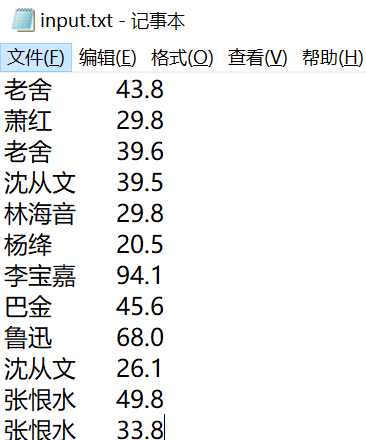

In [3]:
'''获取文件内容'''
import re
#要处理的文件名
fileName = 'input.txt'

#打开文件
file_nature = open(fileName,encoding='UTF-8') 

author = []
price = []
#按行处理
for line in file_nature:
    #去掉行末的换行符
    line = line.replace("\r","").replace("\n","")
    #将作者与价格分隔开
    if(line != ""):
        m = line.split("\t")
        author.append(m[0])
        price.append(m[1])
#关闭文件
file_nature.close()

In [4]:
#对作者进行统计出现次数
from collections import Counter
result = Counter(author)
result = list(sorted(result.items(), key=lambda x: x[1], reverse=True))
result

[('老舍', 17),
 ('鲁迅', 13),
 ('萧红', 8),
 ('巴金', 7),
 ('沈从文', 5),
 ('张恨水', 4),
 ('罗广斌', 2),
 ('林海音', 1),
 ('杨绛', 1),
 ('李宝嘉', 1),
 ('郁达夫', 1)]

In [5]:
#平均值
avg = []

#出现次数低于1的作者书籍总售价
other_price = 0.0

#出现次数低于1的作者统计
other_count = 0

#遍历统计结果，计算书籍均价
for i in range(len(result)):
    if result[i][1] > 1:
        index = [j for j,x in enumerate(author) if x == result[i][0]]
        Sum = 0.0
        for k in index:
            Sum += float(price[k])
        avg.append(round(Sum/len(index),2))
    else:
        index = [j for j,x in enumerate(author) if x == result[i][0]]
        for k in index:
            other_price += float(price[k])
        other_count += 1
#将其他作者的均价加入
avg.append(round(other_price/other_count,2))
avg         

[45.56, 37.73, 45.39, 42.27, 29.28, 76.72, 37.05, 42.67]

In [6]:
import pandas as pd
#出现次数大于1的作者
data = result[0:len(avg)-1]
data = pd.DataFrame(data).sort_values(by = [1]).reset_index(drop=True)#将数据从list转为dataFrame类型
#将其他作者的统计个数加入数据
data.loc[-1] = ['其他',other_count]
data.sort_index(inplace=True)
data

,0,1
-1,其他,4
0,罗广斌,2
1,张恨水,4
2,沈从文,5
3,巴金,7
4,萧红,8
5,鲁迅,13
6,老舍,17


No handles with labels found to put in legend.


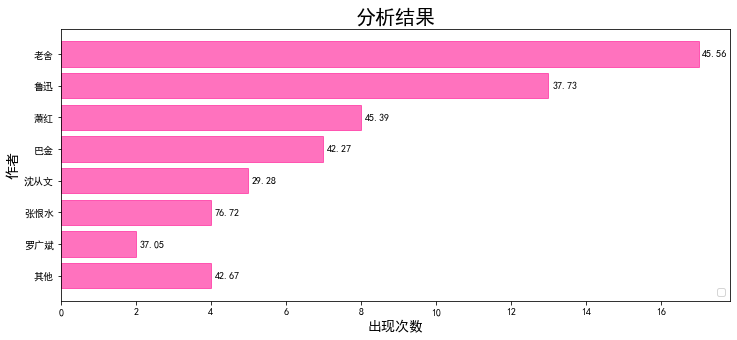

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #定义使其正常显示中文字体黑体
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示表示负号

plt.figure(figsize=(12,5))#设置画布的尺寸
plt.title('分析结果',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'出现次数',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'作者',fontsize=14)#设置y轴，并设定字号大小
 
#alpha：透明度；facecolor：柱子填充色；edgecolor：柱子轮廓色；lw：柱子轮廓的宽度；
plt.barh(data[0],data[1], alpha=0.6, facecolor = 'deeppink', edgecolor = 'deeppink')

# 为每个条形图添加数值标签
i = len(avg)-1
for x,y in enumerate(data[1]):
    plt.text(y+0.1,x,'%s' %avg[i],va='center')
    i -= 1

plt.legend(loc=4)#图例展示位置，数字代表第几象限
plt.show()#显示图像
